<a href="https://colab.research.google.com/github/LucasCabra7/Teste-Tecnico-Programa-Trainee-triggo.ai/blob/main/Teste_T%C3%A9cnico_Triggo_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparação dos dados**

In [ ]:
# Importando bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Conjunto de dados de clientes

In [ ]:
conj_dados_clientes = pd.read_csv('olist_customers_dataset.csv')

In [ ]:
conj_dados_clientes

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
# Verificando se as colunas são dados Qualitativos ou Quantitativos.
conj_dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# Verificar se há linhas com valor Null/Nulo.
conj_dados_clientes.isnull().values.any()

np.False_

In [ ]:
# Verificar se há dados duplicados.
conj_dados_clientes.duplicated().any()

np.False_

In [ ]:
# Estados.
conj_dados_clientes['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [ ]:
# Distribuição de clientes por estados.
conj_dados_clientes['customer_state'].value_counts()

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


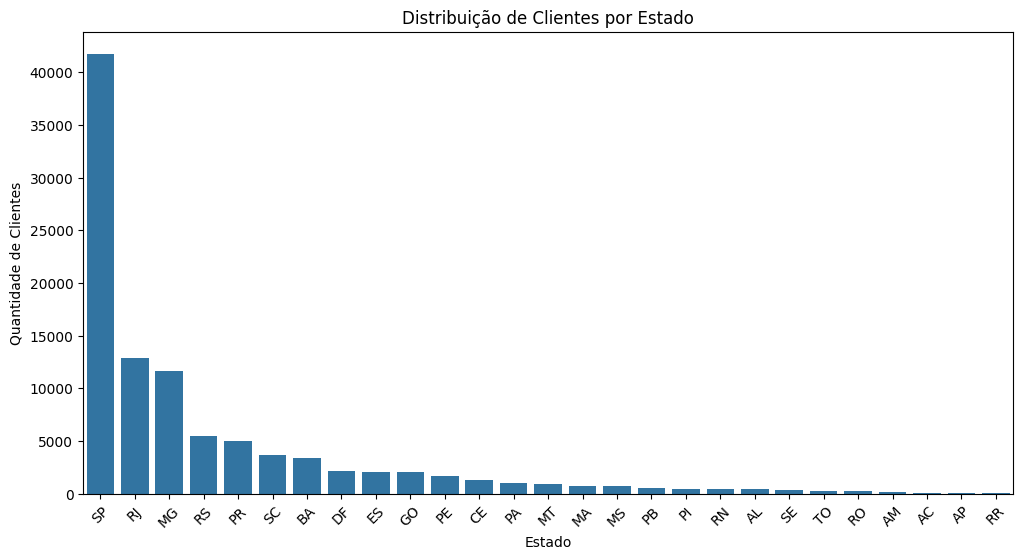

In [ ]:
# Gráfico de barras, para visualização da Distribuição de clientes por estado.
plt.figure(figsize=(12, 6))
sns.countplot(x='customer_state', data=conj_dados_clientes, order=conj_dados_clientes['customer_state'].value_counts().index)
plt.title('Distribuição de Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation = 45)
plt.show()

Conjunto de dados de itens do pedido da lista:

In [ ]:
conj_dados_itens = pd.read_csv('olist_order_items_dataset.csv')

In [ ]:
conj_dados_itens

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
# Verificando se as colunas são dados Qualitativos ou Quantitativos.
conj_dados_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Verifica se há linhas nulas.
conj_dados_itens.isnull().values.any()

np.False_

In [ ]:
# Verificar se há dados duplicados.
conj_dados_itens.duplicated().any()

np.False_

In [ ]:
# Visualizar a coluna de price.
conj_dados_itens['price']

,price
0,58.90
1,239.90
2,199.00
3,12.99
4,199.90
...,...
112645,299.99
112646,350.00
112647,99.90
112648,55.99


In [ ]:
# Ordenação dos dados (rol) crescente pela coluna de preços.
dados_itens_preco = conj_dados_itens.sort_values(by='price', ascending=True)

In [ ]:
dados_itens_preco

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
...,...,...,...,...,...,...,...
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21


In [ ]:
 # Quantidade de vezes de um item comprado.
dados_itens_preco['seller_id'].value_counts()

,count
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...
6c6cc59a5c00cacc5054ca06d65cc282,1
ee27a8f15b1dded4d213a468ba4eb391,1
5bba18b40e8c973b0f32e748004775b0,1


Conjunto de dados de produtos da lista:


In [ ]:
conj_dados_produtos = pd.read_csv('olist_products_dataset.csv')

In [ ]:
conj_dados_produtos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
# Verificando se as colunas são dados Qualitativos ou Quantitativos.
conj_dados_produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
# Verificando se os dados tem valores Null.
conj_dados_produtos.isnull().values.any()

np.True_

In [ ]:
# Verifica quantas linhas tem valor Null.
conj_dados_produtos.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# Excluir todas as linhas com valor Null.
conj_dados_produtos = conj_dados_produtos.dropna()

In [ ]:
# Verificar se há linhas com valor Null.
conj_dados_produtos.isnull().values.any()

np.False_

In [ ]:
# Verificar se há dados duplicados.
conj_dados_produtos.duplicated().any()

np.False_

In [ ]:
# Verificar a quantidade de produtos pelo nome.
conj_dados_produtos['product_category_name'].value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [ ]:
# Ordernar os dados de forma descrecente em função da quantidade de produtos.
categoria_ordenada_produtos = conj_dados_produtos['product_category_name'].value_counts().reset_index()
categoria_ordenada_produtos.columns = ['product_category_name', 'count']

# Juntar os dados
dados_produtos_pedidos = conj_dados_produtos.merge(categoria_ordenada_produtos, on='product_category_name')

# Qtd de produtos por categoria
dados_produtos_pedidos = dados_produtos_pedidos.sort_values(by='count', ascending=False)

In [ ]:
dados_produtos_pedidos

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count
32339,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0,3029
15242,e25a1bed3de19f42a0719cff1c771436,cama_mesa_banho,57.0,677.0,1.0,1250.0,19.0,17.0,22.0,3029
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,3029
32329,dfec64aac9b864b2807a7be33222b75f,cama_mesa_banho,58.0,252.0,4.0,850.0,38.0,7.0,28.0,3029
10,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54.0,630.0,1.0,1100.0,16.0,10.0,16.0,3029
...,...,...,...,...,...,...,...,...,...,...
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,3
16608,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,3
30826,6c7a0a349ad11817745e3ad58abd5c79,seguros_e_servicos,55.0,506.0,1.0,1225.0,27.0,35.0,15.0,2
5935,8db75af9aed3315374db44d7860e25da,seguros_e_servicos,48.0,461.0,4.0,400.0,26.0,22.0,11.0,2


Conjuto de dados de pagamentos de pedidos

In [ ]:
conj_pagamentos = pd.read_csv('olist_order_payments_dataset.csv')

In [ ]:
conj_pagamentos

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
# Verificar informações do conjuto de dados
conj_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# Verificar se há dados Null
conj_pagamentos.isnull().values.any()

np.False_

In [ ]:
# Verificar se há dados duplicados
conj_pagamentos.duplicated().any()

np.False_

In [ ]:
# Verificar a quantidade de dados da coluna do tipo de pagamento
conj_pagamentos['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [ ]:
# Remover registros com tipo de pagamento 'not_defined'
conj_pagamentos = conj_pagamentos[conj_pagamentos['payment_type'] != 'not_defined']


In [ ]:
conj_pagamentos['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529


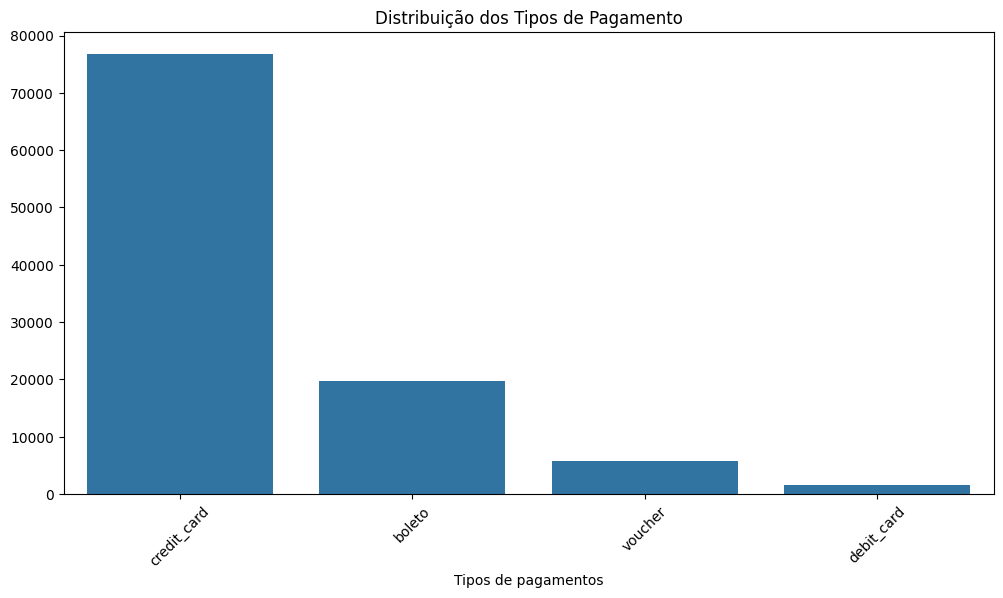

In [ ]:
# Criar um gráfico de barras, para visualização do tipo de pagamento em função da quantidade
plt.figure(figsize=(12, 6))
sns.countplot(x='payment_type', data=conj_pagamentos, order=conj_pagamentos['payment_type'].value_counts().index)
plt.title('Distribuição dos Tipos de Pagamento')
plt.xlabel('Tipos de pagamentos')
plt.ylabel('')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Soma do valor total pago por tipo de pagamento
total_pagamentos = conj_pagamentos.groupby('payment_type')['payment_value'].sum()

In [ ]:
total_pagamentos

,payment_value
payment_type,
boleto,2869361.27
credit_card,12542084.19
debit_card,217989.79
voucher,379436.87


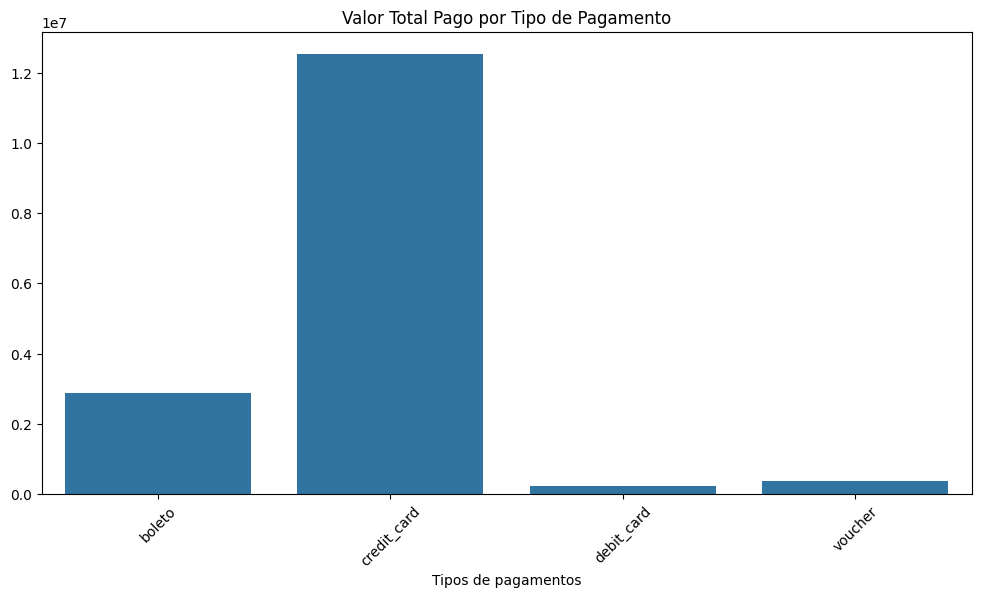

In [ ]:
# Criar um gráfico de barras, para visualização do valor total pago por tipo de pagamento
plt.figure(figsize=(12, 6))
sns.barplot(x=total_pagamentos.index, y=total_pagamentos.values)
plt.title('Valor Total Pago por Tipo de Pagamento')
plt.xlabel('Tipos de pagamentos')
plt.xticks(rotation = 45)
plt.show()

Conjunto de dados de vendedores

In [ ]:
conj_vendedores = pd.read_csv('olist_sellers_dataset.csv')

In [ ]:
conj_vendedores

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
# Verificando informações qualitativas e quantitativa dos dados
conj_vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# Verificando se ha dados com valores Null
conj_vendedores.isnull().values.any()

np.False_

In [ ]:
# Verificando se há dados duplicados
conj_vendedores.duplicated().any()

np.False_

In [ ]:
# Verifica a coluna 'seller_state'
conj_vendedores['seller_state'].value_counts()

,count
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


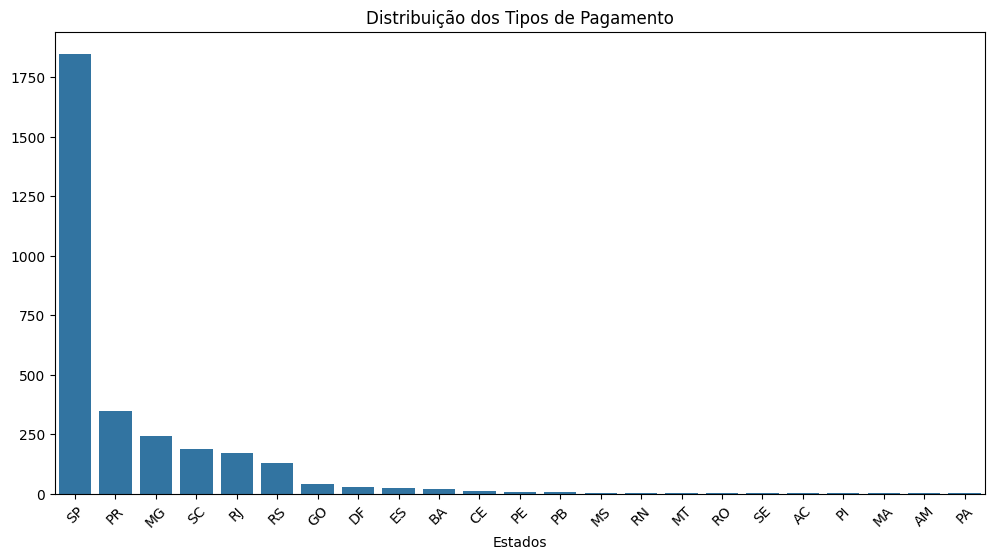

In [ ]:
# Criar um gráfico de barras que represente a quantidade de vendedores em cada estado, facilitando a análise da distribuição geográfica.
plt.figure(figsize=(12, 6))
sns.countplot(x='seller_state', data=conj_vendedores, order=conj_vendedores['seller_state'].value_counts().index)
plt.title('Distribuição dos Tipos de Pagamento')
plt.xlabel('Estados')
plt.ylabel('')
plt.xticks(rotation = 45)
plt.show()

Conjunto de dados de Avaliações

In [ ]:
conj_avaliacao = pd.read_csv('olist_order_reviews_dataset.csv')

In [ ]:
conj_avaliacao

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
# Verificar informações dos dados
conj_avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Verificar se há dados NULL na coluna 'review_score'
conj_avaliacao['review_score'].isnull().values.any()

np.False_

In [ ]:
# Verificar se há dados duplicados
conj_avaliacao.duplicated().any()

np.False_

In [ ]:
# Ordenar os dados em ordem decrescente com base na coluna 'review_score'
conj_avaliacao = conj_avaliacao.sort_values(by='review_score', ascending=False)

In [ ]:
conj_avaliacao

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
...,...,...,...,...,...,...,...
57329,96ec32719edab5fd4f9cb4d83f7442d5,a63e4b82c362c488802abe5a133440aa,1,NaN,Na embalagem consta que é de 500mg porém cada ...,2017-08-12 00:00:00,2017-08-13 04:40:07
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,NaN,Nada de chegar o meu pedido.,2017-04-21 00:00:00,2017-04-23 05:37:03


In [ ]:
# Verificar os dados da coluna 'review_score'
conj_avaliacao['review_score'].value_counts()

,count
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


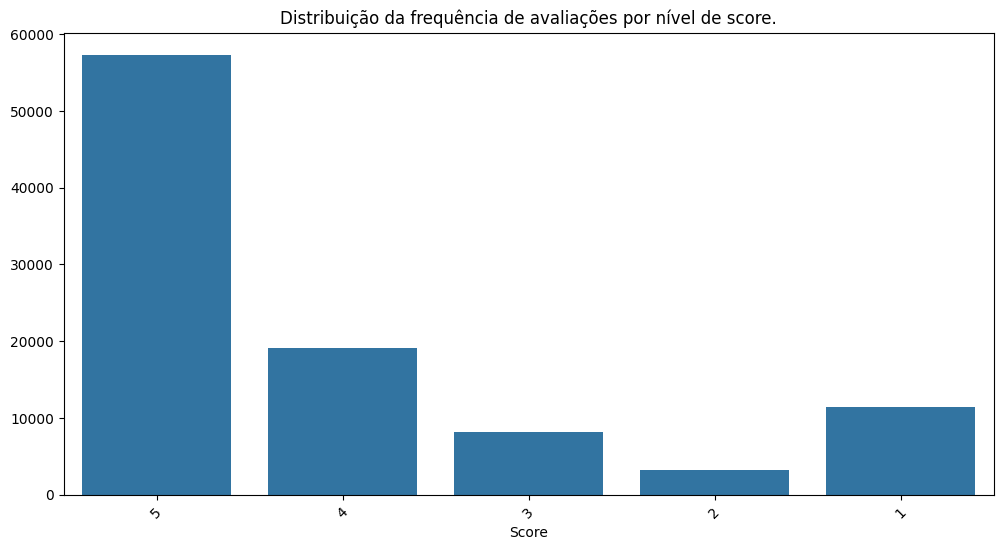

In [ ]:
# Criar um gráfico de barras que represente a quantidade de reviews com base no score.
plt.figure(figsize=(12, 6))
sns.countplot(x='review_score', data=conj_avaliacao, order=[5, 4, 3, 2, 1])
plt.title('Distribuição da frequência de avaliações por nível de score.')
plt.xlabel('Score')
plt.ylabel('')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Dados estatísticos dos Reviews
conj_avaliacao.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<ipython-input-131-b9973391616d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', data=conj_avaliacao, palette='Set2')


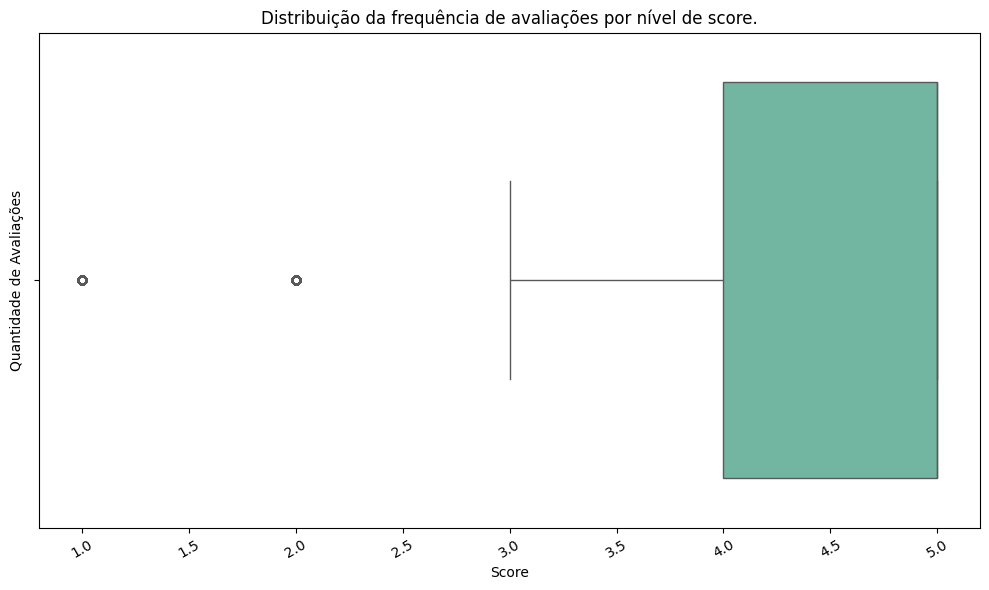

In [ ]:
# Construir um boxplot para visualizar a dispersão, a mediana e os valores discrepantes da amostra.
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', data=conj_avaliacao, palette='Set2')
plt.title('Distribuição da frequência de avaliações por nível de score.')
plt.xlabel('Score')
plt.ylabel('Quantidade de Avaliações')
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()